In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import numpy as np
from itertools import cycle
import time

In [3]:
def drawRec(canvasX,canvasY,canvas):
    '''
    draw the rectangle on the canvas with random size at random point
    :param canvasX: width of canvas
    :param canvasY: height of canvas
    :param canvas: canvas
    :return:
    '''
    startX = random.randint(0,canvasX)
    startY = random.randint(0,canvasY)
    width = random.randint(0,canvasX-startX)
    height = random.randint(0,canvasY-startY)
    if (width == 0) or (height == 0):
        return drawRec(canvasX, canvasY, canvas)
    else:
        cycol = ('bgrcmyk')
        color = cycol[(random.randint(0, 6))]
        rectangle = plt.Rectangle((startX,startY),width,height,edgecolor=color, linewidth='3', facecolor=color, alpha=0.1)
        return canvas,startX,startY,width,height,rectangle

    return canvas, startX,startY,width,height,rectangle


In [4]:
def saveRecinfo(x,y,width,height,listRec):
    '''
    save the rectangle information in to the list of rectangles on canvas
    :param x: start x of rec
    :param y: start y or rec
    :param width: width of rec
    :param height: height of rec
    :param listRec: list of rectangles on the canvas
    :return: list of rectangles in the canvas
    '''
    assert isinstance(listRec,list)
    recinfo = [x,y,width,height]
    listRec.append(recinfo)
    return listRec


In [6]:

def trimRec(listRec,canvas):
    '''

    :param listRec:
    :param canvas:
    :return:
    '''

    if len(listRec) ==1 :
        pass

    idxLast = len(listRec)-1
    lastX = listRec[idxLast][0]
    lastY = listRec[idxLast][1]
    lastWidth = listRec[idxLast][2]
    lastHeight = listRec[idxLast][3]
    Point3 = [lastX,lastY]
    Point4 = [lastX+lastWidth, lastY+lastHeight]
    #max_Area include data of [Area,index.1st of 2nd rectnagle]
    max_Area = [0,0,0]
    newRec =[0,0,0,0]
    for i in range(len(listRec)-1):
        currX = listRec[i][0]
        currY = listRec[i][1]
        currWidth = listRec[i][2]
        currHeight = listRec[i][3]
        maxX = currX + currWidth
        maxY = currY + currHeight
        Point1 = [currX,currY]
        Point2 = [maxX,maxY]
        #check the corrupt of rectangle
        if((Point1[0] <Point3[0]) and(Point2[0] <Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 1 - right lower - 2rec")
            firstArea = (Point4[0]-Point2[0])*lastHeight
            secondArea = (Point1[1] - Point3[1])*lastWidth
            if (max(firstArea, secondArea) >= max_Area[0]):
                if (firstArea > secondArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point4[0] - Point2[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]

        elif((Point1[0] > Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 2- left lower - 2rec")
            firstArea =(Point1[0]-Point3[0])*lastHeight
            secondArea = (Point1[1] - Point3[1])*lastWidth
            if (max(firstArea, secondArea) >= max_Area[0]):
                if (firstArea > secondArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0] - Point3[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]

        elif((Point1[0] < Point3[0]) and(Point2[0] < Point4[0])and (Point1[1] < Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 3 - right upper - 2rec")
            firstArea = (Point4[1] - Point2[1])*lastWidth
            secondArea = (Point4[0]-Point2[0]) * lastHeight
            if (max(firstArea, secondArea) >= max_Area[0]):
                if (firstArea > secondArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point2[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]
                else:
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point4[0]-Point2[0]
                    newRec[3] = lastHeight

        elif((Point1[0] > Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 4 - left upper - 2rec")
            firstArea = (Point1[0] - Point3[0])*lastHeight
            secondArea = (Point4[1] - Point2[1])*lastWidth
            if (max(firstArea, secondArea) >= max_Area[0]):
                if (firstArea > secondArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0] - Point3[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point2[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]

        elif ((Point1[0] > Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 5 - Paralel left - 1 rec")
            firstArea = (Point1[0]-Point3[0])*lastHeight
            if (firstArea >= max_Area[0]):
                max_Area[0] = firstArea
                max_Area[1] = i
                max_Area[2] = 0
                newRec[0] = Point3[0]
                newRec[1] = Point3[1]
                newRec[2] = Point1[0] - Point3[0]
                newRec[3] = lastHeight

        elif ((Point1[0] < Point3[0]) and (Point2[0] < Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 6 - Parallel right - 1 rec")
            firstArea = (Point4[0]-Point2[0])*lastHeight
            if (firstArea >= max_Area[0]):
                max_Area[0] = firstArea
                max_Area[1] = i
                max_Area[2] = 0
                newRec[0] = Point2[0]
                newRec[1] = Point3[1]
                newRec[2] = Point4[0] - Point2[0]
                newRec[3] = lastHeight

        elif ((Point1[0] < Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 7 - Parallel down - 1 rec")
            firstArea = (Point1[1]-Point3[1])*lastWidth
            if (firstArea >= max_Area[0]):
                max_Area[0] = firstArea
                max_Area[1] = i
                max_Area[2] = 0
                newRec[0] = Point3[0]
                newRec[1] = Point3[1]
                newRec[2] = lastWidth
                newRec[3] = Point1[1]-Point3[1]

        elif ((Point1[0] < Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 8 - parallel up - 1 rec")
            firstArea = (Point4[1]-Point2[1])*lastWidth
            if (firstArea >= max_Area[0]):
                max_Area[0] = firstArea
                max_Area[1] = i
                max_Area[2] = 0
                newRec[0] = Point3[0]
                newRec[1] = Point2[1]
                newRec[2] = lastWidth
                newRec[3] = Point4[1]-Point2[1]

        elif ((Point1[0] > Point3[0]) and (Point2[0] < Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 9 - Totally outside - 4 rec")
            firstArea =(Point4[1] - Point2[1]) * lastWidth
            secondArea =(Point1[1] - Point3[1])*lastWidth
            thirdArea = (Point1[0]-Point3[0])*lastHeight
            fourthArea = (Point4[0] - Point2[0])*lastHeight
            if(max(firstArea,secondArea,thirdArea,fourthArea) >= max_Area[0]):
                if (max(firstArea,secondArea,thirdArea,fourthArea) == firstArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point2[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]
                elif(max(firstArea,secondArea,thirdArea,fourthArea) == secondArea):
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]
                elif(max(firstArea,secondArea,thirdArea,fourthArea) == thirdArea):
                    max_Area[0] = thirdArea
                    max_Area[1] = i
                    max_Area[2] = 2
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0]-Point3[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = fourthArea
                    max_Area[1] = i
                    max_Area[2] = 3
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point4[0] - Point2[0]
                    newRec[3] = lastHeight

        elif ((Point1[0] < Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 10 - Totally inside - no rec")
            newRec[0] = lastX
            newRec[1] = lastY
            newRec[2] = lastWidth
            newRec[3] = lastHeight
        elif ((Point1[0] > Point3[0]) and (Point2[0] < Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 11 - long Parallel - 2 rec right and left")
            firstArea = (Point1[0] - Point3[0])*lastHeight
            secondArea = (Point4[0] - Point2[0])*lastHeight
            if (max(firstArea, secondArea) >= max_Area[0]):
                if (firstArea > secondArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0] - Point3[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point4[0] - Point2[0]
                    newRec[3] = lastHeight

        elif ((Point1[0] < Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 12 - tall Parallel - 2 rec up and down")
            firstArea = (Point4[1] - Point2[1])*lastWidth
            secondArea = (Point1[1] - Point3[1])*lastWidth
            if (max(firstArea, secondArea) >= max_Area[0]):
                if (firstArea > secondArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]
                else:
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]

        elif ((Point1[0] > Point3[0]) and (Point2[0] < Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] > Point4[1])):
            print("Case of 13 - Supper down - 3rec ")
            firstArea = (Point1[0] - Point3[0])*lastHeight
            secondArea = (Point1[1] - Point3[1])*lastWidth
            thirdArea = (Point4[0]-Point2[0])*lastHeight
            if(max(firstArea,secondArea,thirdArea) > max_Area[0]):
                if(max(firstArea,secondArea,thirdArea) == firstArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0] - Point3[0]
                    newRec[3] = lastHeight
                elif(max(firstArea,secondArea,thirdArea) == secondArea):
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]
                else:
                    max_Area[0] = thirdArea
                    max_Area[1] = i
                    max_Area[2] = 2
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] =Point4[0]-Point2[0]
                    newRec[3] = lastHeight

        elif ((Point1[0] > Point3[0]) and (Point2[0] < Point4[0]) and (Point1[1] < Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 14 - Supper up - 3rec ")
            firstArea = (Point1[0] - Point3[0]) * lastHeight
            secondArea = (Point4[1] - Point2[1]) * lastWidth
            thirdArea = (Point4[0] - Point2[0]) * lastHeight
            if (max(firstArea, secondArea, thirdArea) > max_Area[0]):
                if (max(firstArea, secondArea, thirdArea) == firstArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0] - Point3[0]
                    newRec[3] = lastHeight
                elif (max(firstArea, secondArea, thirdArea) == secondArea):
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point2[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]
                else:
                    max_Area[0] = thirdArea
                    max_Area[1] = i
                    max_Area[2] = 2
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point4[0] - Point2[0]
                    newRec[3] = lastHeight

        elif ((Point1[0] < Point3[0]) and (Point2[0] < Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 15 -Supper right - 3rec")
            firstArea = (Point1[1] - Point3[1]) * lastWidth
            secondArea = (Point4[0] - Point2[0]) * lastHeight
            thirdArea = (Point4[1] - Point2[1]) * lastWidth
            if (max(firstArea, secondArea, thirdArea) > max_Area[0]):
                if (max(firstArea, secondArea, thirdArea) == firstArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]
                elif (max(firstArea, secondArea, thirdArea) == secondArea):
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point2[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point4[0] - Point2[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = thirdArea
                    max_Area[1] = i
                    max_Area[2] = 2
                    newRec[0] = Point3[0]
                    newRec[1] = Point2[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]


        elif ((Point1[0] > Point3[0]) and (Point2[0] > Point4[0]) and (Point1[1] > Point3[1]) and (Point2[1] < Point4[1])):
            print("Case of 16 - Supper left - 3rec ")
            firstArea = (Point1[1] - Point3[1]) * lastWidth
            secondArea = (Point1[0] - Point3[0]) * lastHeight
            thirdArea = (Point4[1] - Point2[1]) * lastWidth
            if (max(firstArea, secondArea, thirdArea) > max_Area[0]):
                if (max(firstArea, secondArea, thirdArea) == firstArea):
                    max_Area[0] = firstArea
                    max_Area[1] = i
                    max_Area[2] = 0
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point1[1] - Point3[1]
                elif (max(firstArea, secondArea, thirdArea) == secondArea):
                    max_Area[0] = secondArea
                    max_Area[1] = i
                    max_Area[2] = 1
                    newRec[0] = Point3[0]
                    newRec[1] = Point3[1]
                    newRec[2] = Point1[0] - Point3[0]
                    newRec[3] = lastHeight
                else:
                    max_Area[0] = thirdArea
                    max_Area[1] = i
                    max_Area[2] = 2
                    newRec[0] = Point3[0]
                    newRec[1] = Point2[1]
                    newRec[2] = lastWidth
                    newRec[3] = Point4[1] - Point2[1]
        else:
            print("rectangle not corrupted")
            newRec[0] = lastX
            newRec[1] = lastY
            newRec[2] = lastWidth
            newRec[3] = lastHeight
    p = patches.Rectangle((listRec[idxLast][0],listRec[idxLast][1]),listRec[idxLast][2],listRec[idxLast][3],fill=False,edgecolor="none")
    listRec[idxLast] = newRec
    print(listRec[idxLast])
    cycol = ('bgrcmyk')
    color = cycol[(random.randint(0, 6))]
    rectangle = plt.Rectangle((newRec[0], newRec[1]), newRec[2], newRec[3], edgecolor=color, linewidth='3', facecolor=color,alpha=0.1)
    return listRec,rectangle,p

In [7]:

def gettotalsurface(listRec):
    '''
    sum of all the recatangle surfaces in the canvas
    :param listRec: list of rectangles in the canvas with rectangle information
    :return: totalArea:
    '''
    totalArea = 0

    for i in range(len(listRec)):
        width_i = listRec[i][2]
        height_o = listRec[i][3]
        totalArea = totalArea + (width_i*height_o)

    return totalArea

In [8]:

def main(canvasX,canvasY):
    '''
    main function draw the rectangle as much as we can draw, and if it is over the max
    surface area amount(width x he
    :param canvasX: width of the canvas,input by the user at the beginning
    :param canvasY: height of the canvas,input by the user at the beginnig
    :return: canvas,
    '''

    canvas = plt.figure()        # draw the canvas
    ax =canvas.add_subplot(111)  # setting for the canvas add_subplot
    plt.xlim(0,canvasX)          # x limit of canvas
    plt.ylim(0,canvasY)          # y limit of canvas
    listRec = []                 # empty list for rectangles

    # draw first rectangle on the canvas
    [canvas, x, y, width, height, rectangle] = drawRec(canvasX, canvasY, canvas)
    ax.add_patch(rectangle)
    saveRecinfo(x, y, width, height, listRec)   # save rectangle information on the list

    #print(listRec)

    canvasArea = canvasX*canvasY # total area of canvas
    totalArea = 0                # total area parameter for rectangles sum
    recCnt = 1                   # we don't trim the first rectangle so counter start with 1

    #  while loop, we draw and trim the rectangle till...
    #  the sum of surface of rectangles goes over than total canvas area
    while(totalArea<=canvasArea):
        print("before add rectangle")
        print(totalArea)
        [canvas, x, y, width, height, rectangle] = drawRec(canvasX, canvasY, canvas)
        ax.add_patch(rectangle)
        saveRecinfo(x, y, width, height, listRec)
        [listRec, rectangle,p] = trimRec(listRec, canvas)
        totalArea = gettotalsurface(listRec)
        #print(totalArea)
        print(listRec)
        ax.add_patch(p)
        ax.add_patch(rectangle)
    #remove the last item of the rectangle which makes it over the canvas Area
    listRec.pop()
    num_rec = len(listRec)
    finalArea = gettotalsurface(listRec)
    plt.show()

    return  canvas,finalArea,num_rec

In [9]:
trialcycle = input("How many cycle you want to run :")

How many cycle you want to run :1


In [10]:
canvasX = input("What is the x limit of canvas :")
canvasY = input("what is the y limit of canvas :")

What is the x limit of canvas :10
what is the y limit of canvas :10


In [11]:
canvasSurface = canvasX*canvasY

In [12]:
print(canvasSurface)

100


before add rectangle
0
Case of 1 - right lower - 2rec
[8, 2, 2, 5]
[[4, 7, 1, 2], [8, 2, 2, 5]]
before add rectangle
12
Case of 1 - right lower - 2rec
rectangle not corrupted
[6, 1, 1, 6]
[[4, 7, 1, 2], [8, 2, 2, 5], [6, 1, 1, 6]]
before add rectangle
18
rectangle not corrupted
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
[0, 0, 8, 5]
[[4, 7, 1, 2], [8, 2, 2, 5], [6, 1, 1, 6], [0, 0, 8, 5]]
before add rectangle
58
Case of 1 - right lower - 2rec
Case of 2- left lower - 2rec
rectangle not corrupted
Case of 8 - parallel up - 1 rec
[5, 1, 1, 2]
[[4, 7, 1, 2], [8, 2, 2, 5], [6, 1, 1, 6], [0, 0, 8, 5], [5, 1, 1, 2]]
before add rectangle
60
rectangle not corrupted
Case of 4 - left upper - 2rec
rectangle not corrupted
rectangle not corrupted
Case of 14 - Supper up - 3rec 
[4, 3, 3, 7]
[[4, 7, 1, 2], [8, 2, 2, 5], [6, 1, 1, 6], [0, 0, 8, 5], [5, 1, 1, 2], [4, 3, 3, 7]]
before add rectangle
81
rectangle not corrupted
Case of 5 - Paralel left - 1 rec
Case of 11 - long Parallel - 2 re

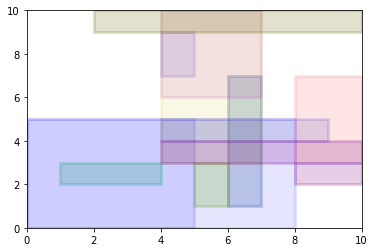

In [13]:
avg_surface = 0
avg_num_rec = 0
for i in range(trialcycle):
    [canvas,finalArea,num_rec] = main(canvasX,canvasY)

    avg_num_rec= avg_num_rec + num_rec
    avg_surface = avg_surface + finalArea

avg_num_rec = float(avg_num_rec/trialcycle)
avg_surface = float(avg_surface/trialcycle)


In [14]:
print ("There are average {} of rectangle communication boxes covering {}% of the Surface.").format(avg_num_rec,float(100.*((avg_surface)/(canvasSurface))))

There are average 9.0 of rectangle communication boxes covering 95.0% of the Surface.


In [15]:
Print ("Another Trial")

NameError: name 'Print' is not defined

In [16]:
print("Another tiral")

Another tiral


In [17]:
trialcycle = input("How many cycle you want to run :")
canvasX = input("What is the x limit of canvas :")
canvasY = input("what is the y limit of canvas :")

How many cycle you want to run :10
What is the x limit of canvas :10
what is the y limit of canvas :10


before add rectangle
0
rectangle not corrupted
[9, 3, 1, 1]
[[6, 2, 4, 4], [9, 3, 1, 1]]
before add rectangle
17
Case of 4 - left upper - 2rec
rectangle not corrupted
[2, 3, 3, 6]
[[6, 2, 4, 4], [9, 3, 1, 1], [2, 3, 3, 6]]
before add rectangle
35
rectangle not corrupted
Case of 4 - left upper - 2rec
Case of 3 - right upper - 2rec
[5, 4, 4, 6]
[[6, 2, 4, 4], [9, 3, 1, 1], [2, 3, 3, 6], [5, 4, 4, 6]]
before add rectangle
59
Case of 16 - Supper left - 3rec 
Case of 16 - Supper left - 3rec 
Case of 13 - Supper down - 3rec 
Case of 2- left lower - 2rec
[0, 0, 9, 8]
[[6, 2, 4, 4], [9, 3, 1, 1], [2, 3, 3, 6], [5, 4, 4, 6], [0, 0, 9, 8]]


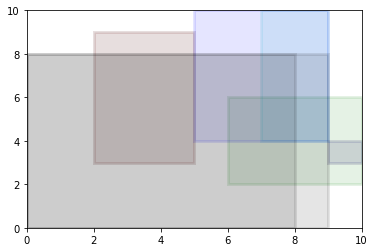

before add rectangle
0
Case of 13 - Supper down - 3rec 
[4, 0, 2, 5]
[[6, 1, 1, 5], [4, 0, 2, 5]]
before add rectangle
15
Case of 3 - right upper - 2rec
Case of 3 - right upper - 2rec
[6, 2, 4, 8]
[[6, 1, 1, 5], [4, 0, 2, 5], [6, 2, 4, 8]]
before add rectangle
47
rectangle not corrupted
rectangle not corrupted
Case of 5 - Paralel left - 1 rec
[1, 3, 5, 2]
[[6, 1, 1, 5], [4, 0, 2, 5], [6, 2, 4, 8], [1, 3, 5, 2]]
before add rectangle
57
rectangle not corrupted
Case of 14 - Supper up - 3rec 
Case of 5 - Paralel left - 1 rec
rectangle not corrupted
[1, 5, 6, 4]
[[6, 1, 1, 5], [4, 0, 2, 5], [6, 2, 4, 8], [1, 3, 5, 2], [1, 5, 6, 4]]
before add rectangle
81
rectangle not corrupted
Case of 4 - left upper - 2rec
Case of 5 - Paralel left - 1 rec
rectangle not corrupted
rectangle not corrupted
[1, 4, 1, 2]
[[6, 1, 1, 5], [4, 0, 2, 5], [6, 2, 4, 8], [1, 3, 5, 2], [1, 5, 6, 4], [1, 4, 1, 2]]
before add rectangle
83
Case of 13 - Supper down - 3rec 
rectangle not corrupted
Case of 2- left lower - 2re

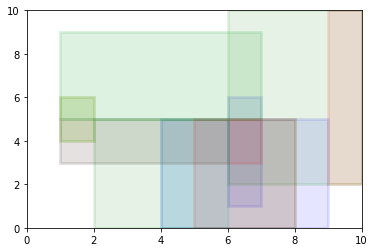

before add rectangle
0
Case of 1 - right lower - 2rec
[1, 6, 9, 1]
[[0, 7, 1, 2], [1, 6, 9, 1]]
before add rectangle
11
rectangle not corrupted
Case of 2- left lower - 2rec
[0, 5, 7, 1]
[[0, 7, 1, 2], [1, 6, 9, 1], [0, 5, 7, 1]]
before add rectangle
18
rectangle not corrupted
rectangle not corrupted
Case of 3 - right upper - 2rec
[7, 7, 2, 1]
[[0, 7, 1, 2], [1, 6, 9, 1], [0, 5, 7, 1], [7, 7, 2, 1]]
before add rectangle
20
rectangle not corrupted
Case of 12 - tall Parallel - 2 rec up and down
Case of 12 - tall Parallel - 2 rec up and down
Case of 16 - Supper left - 3rec 
[3, 4, 4, 5]
[[0, 7, 1, 2], [1, 6, 9, 1], [0, 5, 7, 1], [7, 7, 2, 1], [3, 4, 4, 5]]
before add rectangle
40
rectangle not corrupted
rectangle not corrupted
rectangle not corrupted
Case of 4 - left upper - 2rec
rectangle not corrupted
[3, 8, 3, 1]
[[0, 7, 1, 2], [1, 6, 9, 1], [0, 5, 7, 1], [7, 7, 2, 1], [3, 4, 4, 5], [3, 8, 3, 1]]
before add rectangle
43
Case of 3 - right upper - 2rec
rectangle not corrupted
rectangle no

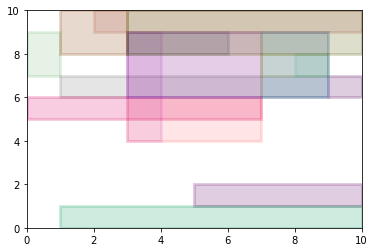

before add rectangle
0
Case of 2- left lower - 2rec
[5, 2, 4, 7]
[[9, 7, 1, 3], [5, 2, 4, 7]]
before add rectangle
31
rectangle not corrupted
Case of 11 - long Parallel - 2 rec right and left
[2, 5, 3, 1]
[[9, 7, 1, 3], [5, 2, 4, 7], [2, 5, 3, 1]]
before add rectangle
34
Case of 2- left lower - 2rec
Case of 5 - Paralel left - 1 rec
rectangle not corrupted
[2, 4, 3, 4]
[[9, 7, 1, 3], [5, 2, 4, 7], [2, 5, 3, 1], [2, 4, 3, 4]]
before add rectangle
46
Case of 2- left lower - 2rec
Case of 5 - Paralel left - 1 rec
Case of 1 - right lower - 2rec
Case of 1 - right lower - 2rec
[4, 3, 4, 4]
[[9, 7, 1, 3], [5, 2, 4, 7], [2, 5, 3, 1], [2, 4, 3, 4], [4, 3, 4, 4]]
before add rectangle
62
rectangle not corrupted
Case of 5 - Paralel left - 1 rec
Case of 4 - left upper - 2rec
rectangle not corrupted
Case of 4 - left upper - 2rec
[0, 7, 3, 1]
[[9, 7, 1, 3], [5, 2, 4, 7], [2, 5, 3, 1], [2, 4, 3, 4], [4, 3, 4, 4], [0, 7, 3, 1]]
before add rectangle
65
rectangle not corrupted
rectangle not corrupted
Case 

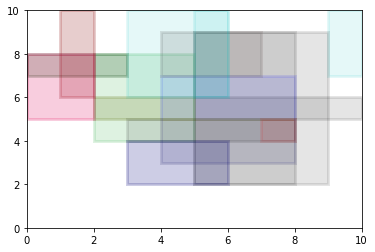

before add rectangle
0
rectangle not corrupted
[2, 5, 1, 3]
[[6, 4, 1, 4], [2, 5, 1, 3]]
before add rectangle
7
Case of 2- left lower - 2rec
rectangle not corrupted
[2, 1, 2, 5]
[[6, 4, 1, 4], [2, 5, 1, 3], [2, 1, 2, 5]]
before add rectangle
17
Case of 1 - right lower - 2rec
Case of 1 - right lower - 2rec
rectangle not corrupted
[8, 1, 1, 2]
[[6, 4, 1, 4], [2, 5, 1, 3], [2, 1, 2, 5], [8, 1, 1, 2]]
before add rectangle
19
Case of 16 - Supper left - 3rec 
Case of 16 - Supper left - 3rec 
Case of 4 - left upper - 2rec
Case of 4 - left upper - 2rec
[0, 2, 8, 7]
[[6, 4, 1, 4], [2, 5, 1, 3], [2, 1, 2, 5], [8, 1, 1, 2], [0, 2, 8, 7]]
before add rectangle
75
Case of 2- left lower - 2rec
Case of 1 - right lower - 2rec
Case of 3 - right upper - 2rec
Case of 4 - left upper - 2rec
Case of 8 - parallel up - 1 rec
[4, 3, 4, 4]
[[6, 4, 1, 4], [2, 5, 1, 3], [2, 1, 2, 5], [8, 1, 1, 2], [0, 2, 8, 7], [4, 3, 4, 4]]
before add rectangle
91
Case of 5 - Paralel left - 1 rec
rectangle not corrupted
rectangle

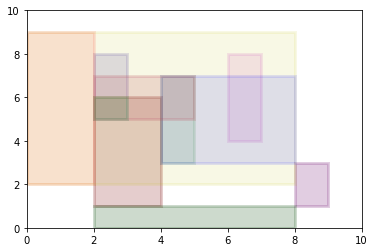

before add rectangle
0
Case of 4 - left upper - 2rec
[2, 8, 5, 2]
[[7, 7, 3, 1], [2, 8, 5, 2]]
before add rectangle
13
Case of 16 - Supper left - 3rec 
rectangle not corrupted
[2, 2, 3, 8]
[[7, 7, 3, 1], [2, 8, 5, 2], [2, 2, 3, 8]]
before add rectangle
37
Case of 4 - left upper - 2rec
rectangle not corrupted
rectangle not corrupted
[3, 9, 6, 1]
[[7, 7, 3, 1], [2, 8, 5, 2], [2, 2, 3, 8], [3, 9, 6, 1]]
before add rectangle
43
rectangle not corrupted
Case of 1 - right lower - 2rec
Case of 6 - Parallel right - 1 rec
Case of 1 - right lower - 2rec
[5, 6, 5, 3]
[[7, 7, 3, 1], [2, 8, 5, 2], [2, 2, 3, 8], [3, 9, 6, 1], [5, 6, 5, 3]]
before add rectangle
58
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
[1, 1, 3, 8]
[[7, 7, 3, 1], [2, 8, 5, 2], [2, 2, 3, 8], [3, 9, 6, 1], [5, 6, 5, 3], [1, 1, 3, 8]]
before add rectangle
82
Case of 16 - Supper left - 3rec 
rectangle not corrupted
rectangle not corru

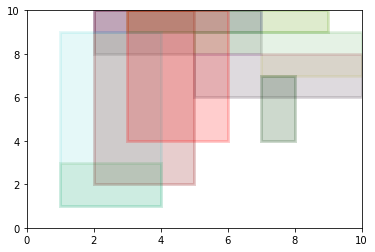

before add rectangle
0
Case of 2- left lower - 2rec
[4, 5, 5, 4]
[[9, 9, 1, 1], [4, 5, 5, 4]]
before add rectangle
21
Case of 2- left lower - 2rec
rectangle not corrupted
[3, 5, 2, 1]
[[9, 9, 1, 1], [4, 5, 5, 4], [3, 5, 2, 1]]
before add rectangle
23
rectangle not corrupted
rectangle not corrupted
Case of 15 -Supper right - 3rec
[5, 4, 5, 5]
[[9, 9, 1, 1], [4, 5, 5, 4], [3, 5, 2, 1], [5, 4, 5, 5]]
before add rectangle
48
rectangle not corrupted
Case of 1 - right lower - 2rec
Case of 1 - right lower - 2rec
rectangle not corrupted
[9, 3, 1, 2]
[[9, 9, 1, 1], [4, 5, 5, 4], [3, 5, 2, 1], [5, 4, 5, 5], [9, 3, 1, 2]]
before add rectangle
50
rectangle not corrupted
Case of 3 - right upper - 2rec
Case of 3 - right upper - 2rec
rectangle not corrupted
rectangle not corrupted
[7, 9, 3, 1]
[[9, 9, 1, 1], [4, 5, 5, 4], [3, 5, 2, 1], [5, 4, 5, 5], [9, 3, 1, 2], [7, 9, 3, 1]]
before add rectangle
53
rectangle not corrupted
Case of 9 - Totally outside - 4 rec
Case of 9 - Totally outside - 4 rec
recta

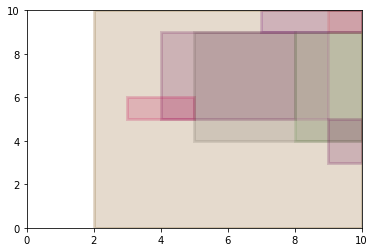

before add rectangle
0
Case of 2- left lower - 2rec
[5, 4, 1, 2]
[[6, 6, 1, 1], [5, 4, 1, 2]]
before add rectangle
3
rectangle not corrupted
Case of 14 - Supper up - 3rec 
[2, 6, 8, 1]
[[6, 6, 1, 1], [5, 4, 1, 2], [2, 6, 8, 1]]
before add rectangle
11
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
[1, 2, 4, 4]
[[6, 6, 1, 1], [5, 4, 1, 2], [2, 6, 8, 1], [1, 2, 4, 4]]
before add rectangle
27
Case of 9 - Totally outside - 4 rec
Case of 14 - Supper up - 3rec 
rectangle not corrupted
Case of 3 - right upper - 2rec
[2, 6, 7, 2]
[[6, 6, 1, 1], [5, 4, 1, 2], [2, 6, 8, 1], [1, 2, 4, 4], [2, 6, 7, 2]]
before add rectangle
41
Case of 9 - Totally outside - 4 rec
Case of 9 - Totally outside - 4 rec
Case of 16 - Supper left - 3rec 
rectangle not corrupted
Case of 16 - Supper left - 3rec 
[1, 2, 7, 7]
[[6, 6, 1, 1], [5, 4, 1, 2], [2, 6, 8, 1], [1, 2, 4, 4], [2, 6, 7, 2], [1, 2, 7, 7]]
before add rectangle
90
Case of 14 - Supper up - 3rec 
Case of 14 - Supper up

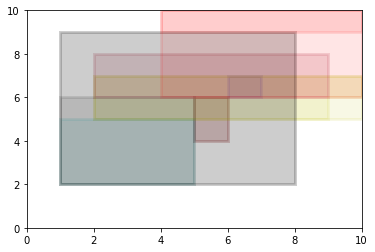

before add rectangle
0
Case of 2- left lower - 2rec
[3, 2, 3, 1]
[[6, 3, 3, 5], [3, 2, 3, 1]]
before add rectangle
18
Case of 9 - Totally outside - 4 rec
rectangle not corrupted
[2, 2, 8, 7]
[[6, 3, 3, 5], [3, 2, 3, 1], [2, 2, 8, 7]]
before add rectangle
74
Case of 5 - Paralel left - 1 rec
Case of 14 - Supper up - 3rec 
Case of 5 - Paralel left - 1 rec
[1, 3, 7, 3]
[[6, 3, 3, 5], [3, 2, 3, 1], [2, 2, 8, 7], [1, 3, 7, 3]]
before add rectangle
95
Case of 2- left lower - 2rec
rectangle not corrupted
Case of 7 - Parallel down - 1 rec
Case of 7 - Parallel down - 1 rec
[4, 1, 2, 2]
[[6, 3, 3, 5], [3, 2, 3, 1], [2, 2, 8, 7], [1, 3, 7, 3], [4, 1, 2, 2]]
before add rectangle
99
Case of 5 - Paralel left - 1 rec
Case of 14 - Supper up - 3rec 
rectangle not corrupted
rectangle not corrupted
Case of 14 - Supper up - 3rec 
[2, 4, 6, 3]
[[6, 3, 3, 5], [3, 2, 3, 1], [2, 2, 8, 7], [1, 3, 7, 3], [4, 1, 2, 2], [2, 4, 6, 3]]


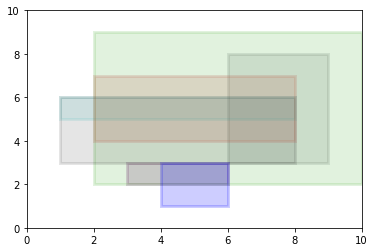

before add rectangle
0
rectangle not corrupted
[6, 7, 3, 3]
[[6, 3, 1, 6], [6, 7, 3, 3]]
before add rectangle
15
rectangle not corrupted
Case of 5 - Paralel left - 1 rec
[5, 8, 1, 1]
[[6, 3, 1, 6], [6, 7, 3, 3], [5, 8, 1, 1]]
before add rectangle
16
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
Case of 2- left lower - 2rec
[1, 0, 4, 8]
[[6, 3, 1, 6], [6, 7, 3, 3], [5, 8, 1, 1], [1, 0, 4, 8]]
before add rectangle
48
Case of 6 - Parallel right - 1 rec
Case of 1 - right lower - 2rec
Case of 1 - right lower - 2rec
rectangle not corrupted
[9, 6, 1, 2]
[[6, 3, 1, 6], [6, 7, 3, 3], [5, 8, 1, 1], [1, 0, 4, 8], [9, 6, 1, 2]]
before add rectangle
50
rectangle not corrupted
rectangle not corrupted
rectangle not corrupted
rectangle not corrupted
rectangle not corrupted
[6, 0, 4, 9]
[[6, 3, 1, 6], [6, 7, 3, 3], [5, 8, 1, 1], [1, 0, 4, 8], [9, 6, 1, 2], [6, 0, 4, 9]]
before add rectangle
86
rectangle not corrupted
rectangle not corrupted
Case of 13 - Supper down - 3rec 
Case of 11 - long

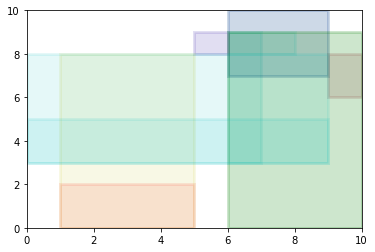

In [18]:
canvasSurface = canvasX*canvasY
avg_surface = 0
avg_num_rec = 0
for i in range(trialcycle):
    [canvas,finalArea,num_rec] = main(canvasX,canvasY)

    avg_num_rec= avg_num_rec + num_rec
    avg_surface = avg_surface + finalArea

avg_num_rec = float(avg_num_rec/trialcycle)
avg_surface = float(avg_surface/trialcycle)


In [19]:
print ("There are average {} of rectangle communication boxes covering {}% of the Surface.").format(avg_num_rec,float(100.*((avg_surface)/(canvasSurface))))

There are average 7.0 of rectangle communication boxes covering 85.0% of the Surface.
